In [90]:
import json
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

result_ppo = []
for line in open('/tmp/LBNL/ray_results/testspeed_ppo_coop_train/testspeed_ppo_coop_train_1822cbca_2020-01-13_23-18-42y5iufyjq/result.json', 'r'):
    result_ppo.append(json.loads(line))
    
result_appo_2 = []
for line in open('/tmp/LBNL/ray_results/testspeed_appo_2_coop_train/testspeed_appo_2_coop_train_e5a84b50_2020-01-14_06-41-06a3uo22uq/result.json', 'r'):
    result_appo_2.append(json.loads(line))
    
result_appo_5 = []
for line in open('/tmp/LBNL/ray_results/testspeed_appo_5_coop_train/testspeed_appo_5_coop_train_b46cd3de_2020-01-14_09-45-51faz0j73f/result.json', 'r'):
    result_appo_5.append(json.loads(line))

In [91]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [92]:
coord_ppo = [[], []]
for i in result_ppo:
    coord_ppo[0].append(i['episode_reward_max'])
    coord_ppo[1].append(i['time_since_restore'])

coord_appo_2 = [[], []]
for i in result_appo_2:
    coord_appo_2[0].append(i['episode_reward_max'])
    coord_appo_2[1].append(i['time_since_restore'])
    
coord_appo_5 = [[], []]
for i in result_appo_5:
    coord_appo_5[0].append(i['episode_reward_max'])
    coord_appo_5[1].append(i['time_since_restore'])

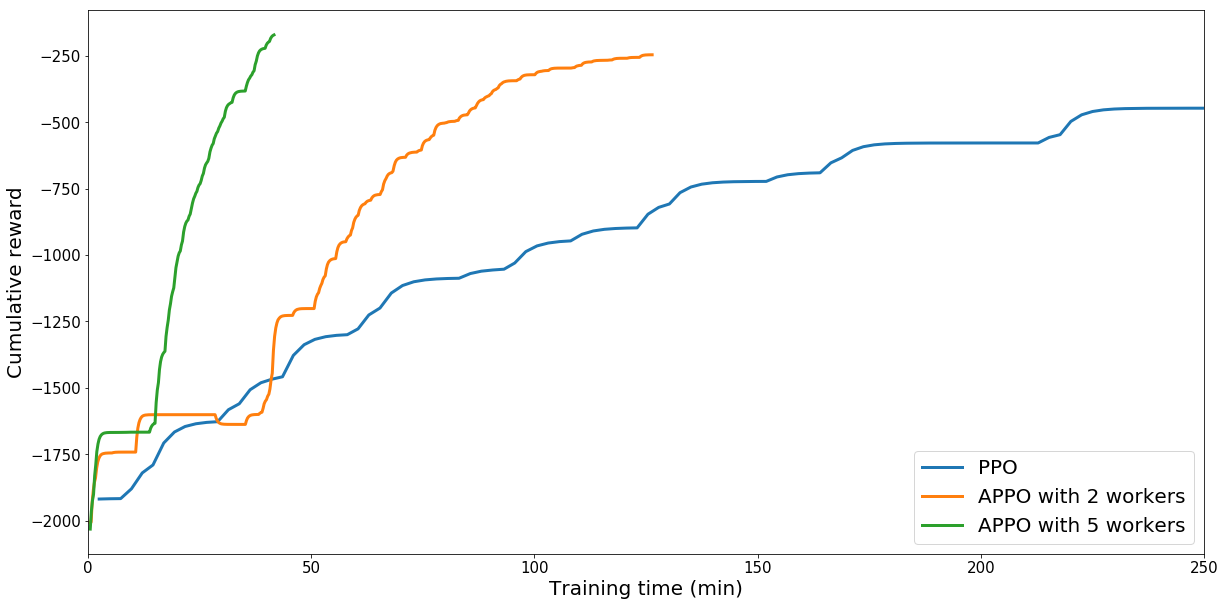

In [110]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(np.array(coord_ppo[1])/60, np.array(smooth(coord_ppo[0], 0.5)), label="PPO", linewidth=3)
ax.plot(np.array(coord_appo_2[1][1:])/60, np.array(smooth(coord_appo_2[0][1:], 0.6)), label="APPO with 2 workers", linewidth=3)
ax.plot(np.array(coord_appo_5[1][1:])/60, np.array(smooth(coord_appo_5[0][1:], 0.6)), label="APPO with 5 workers", linewidth=3)
plt.xlim(0,250)
plt.legend(loc="lower right", fontsize=20)
ax.set_xlabel('Training time (min)', fontsize=20)
ax.set_ylabel('Cumulative reward', fontsize=20)
ax.tick_params(axis='both', labelsize=15)

import copy
result_appo_5_screenshot = copy.deepcopy(result_appo_5)  

In [86]:
maxTime = coord_ppo[1][np.amax(coord_ppo[0])]

TypeError: list indices must be integers or slices, not numpy.float64

In [87]:
np.amax(coord_ppo[0])

-310.7517061318316

In [89]:
np.where(coord_ppo[0] == np.amax(coord_ppo[0]))

(array([146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169]),)